In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Serif'
mpl.rcParams['font.size'] = 14
%config InlineBackend.figure_format = 'retina'

In [2]:
#Mrk421 old data- comparing results with Axel's
#E above 1TeV
D1=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/new_Eg1TeV.root")
#E below 1TeV
D2=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/new_El1TeV.root")

In [3]:
#Mrk421 data from feb to may (OLD) with new specifications.
# E above 1TeV
Data1 = uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/Eg1TeV_latest.root")
# E below 1TeV
Data2 = uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/El1TeV_latest.root")

##lightcurve import
lightC1 = Data1['LightCurve;1']
lightC2 = Data2['LightCurve;1']

#data import
# E above 1TeV
MJD_X = lightC1.all_members['fX']
flux_Y = lightC1.all_members['fY']
MJD_EX = lightC1.all_members['fEX']
flux_EY = lightC1.all_members['fEY']
# E below 1TeV
MJD_x = lightC2.all_members['fX']
flux_y = lightC2.all_members['fY']
MJD_ex = lightC2.all_members['fEX']
flux_ey = lightC2.all_members['fEY']

In [5]:
#Axel's data
#E<1 TeV
data1 = pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/daily_LC_02_1TeV_axel.txt")
#E>1 TeV
data2 = pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/daily_LC_1TeV_axel.txt")


In [7]:
#file.keys()
lightcurve1=D1['LightCurve;1']
lightcurve2=D2['LightCurve;1']

In [11]:
fX = lightcurve2.all_members['fX']
fY = lightcurve2.all_members['fY']
fEX = lightcurve2.all_members['fEX']
fEY = lightcurve2.all_members['fEY']
FX = lightcurve1.all_members['fX']
FY = lightcurve1.all_members['fY']
FEX = lightcurve1.all_members['fEX']
FEY = lightcurve1.all_members['fEY']

In [13]:
#Mrk421 NEW data Feb'24 to June'24
#E above 1TeV
new_D1=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/Eg_1TeV/Eg1TeV_NEW.root")
#E below 1TeV
new_D2=uproot.open("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/data_analysis/Mrk421/flute/El_1TeV/El1TeV_NEW.root")

In [15]:
LC1=new_D1['LightCurve;1']
LC2=new_D2['LightCurve;1']
lcX = LC2.all_members['fX']
lcY = LC2.all_members['fY']
lcEX = LC2.all_members['fEX']
lcEY = LC2.all_members['fEY']
LCX = LC1.all_members['fX']
LCY = LC1.all_members['fY']
LCEX = LC1.all_members['fEX']
LCEY = LC1.all_members['fEY']

In [17]:
#light curve data
fermi = np.loadtxt("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/Mrk421/LC_FERMI_no_UL.txt")
fermi_mjd = fermi[:,0]
fermi_emjd = fermi[:,2]
fermi_flux = fermi[:,1]
fermi_eflux = fermi[:,3]

[1.93150770e-11 1.11923904e-11 9.30936254e-12 8.22988434e-12
 3.85622274e-12 7.64390305e-12 5.46905367e-12] [3.32484103e-12 2.38487134e-12 1.77270221e-12 1.62384553e-12
 1.24173642e-12 1.72885150e-12 1.27754572e-12]
[2.02240599e-10 1.70415721e-10 1.81260916e-10 1.47392880e-10
 9.28606977e-11 1.28015366e-10 1.27037759e-10] [1.65265079e-11 1.44481668e-11 1.18963957e-11 1.07230938e-11
 9.26216579e-12 1.13407151e-11 1.06061695e-11]


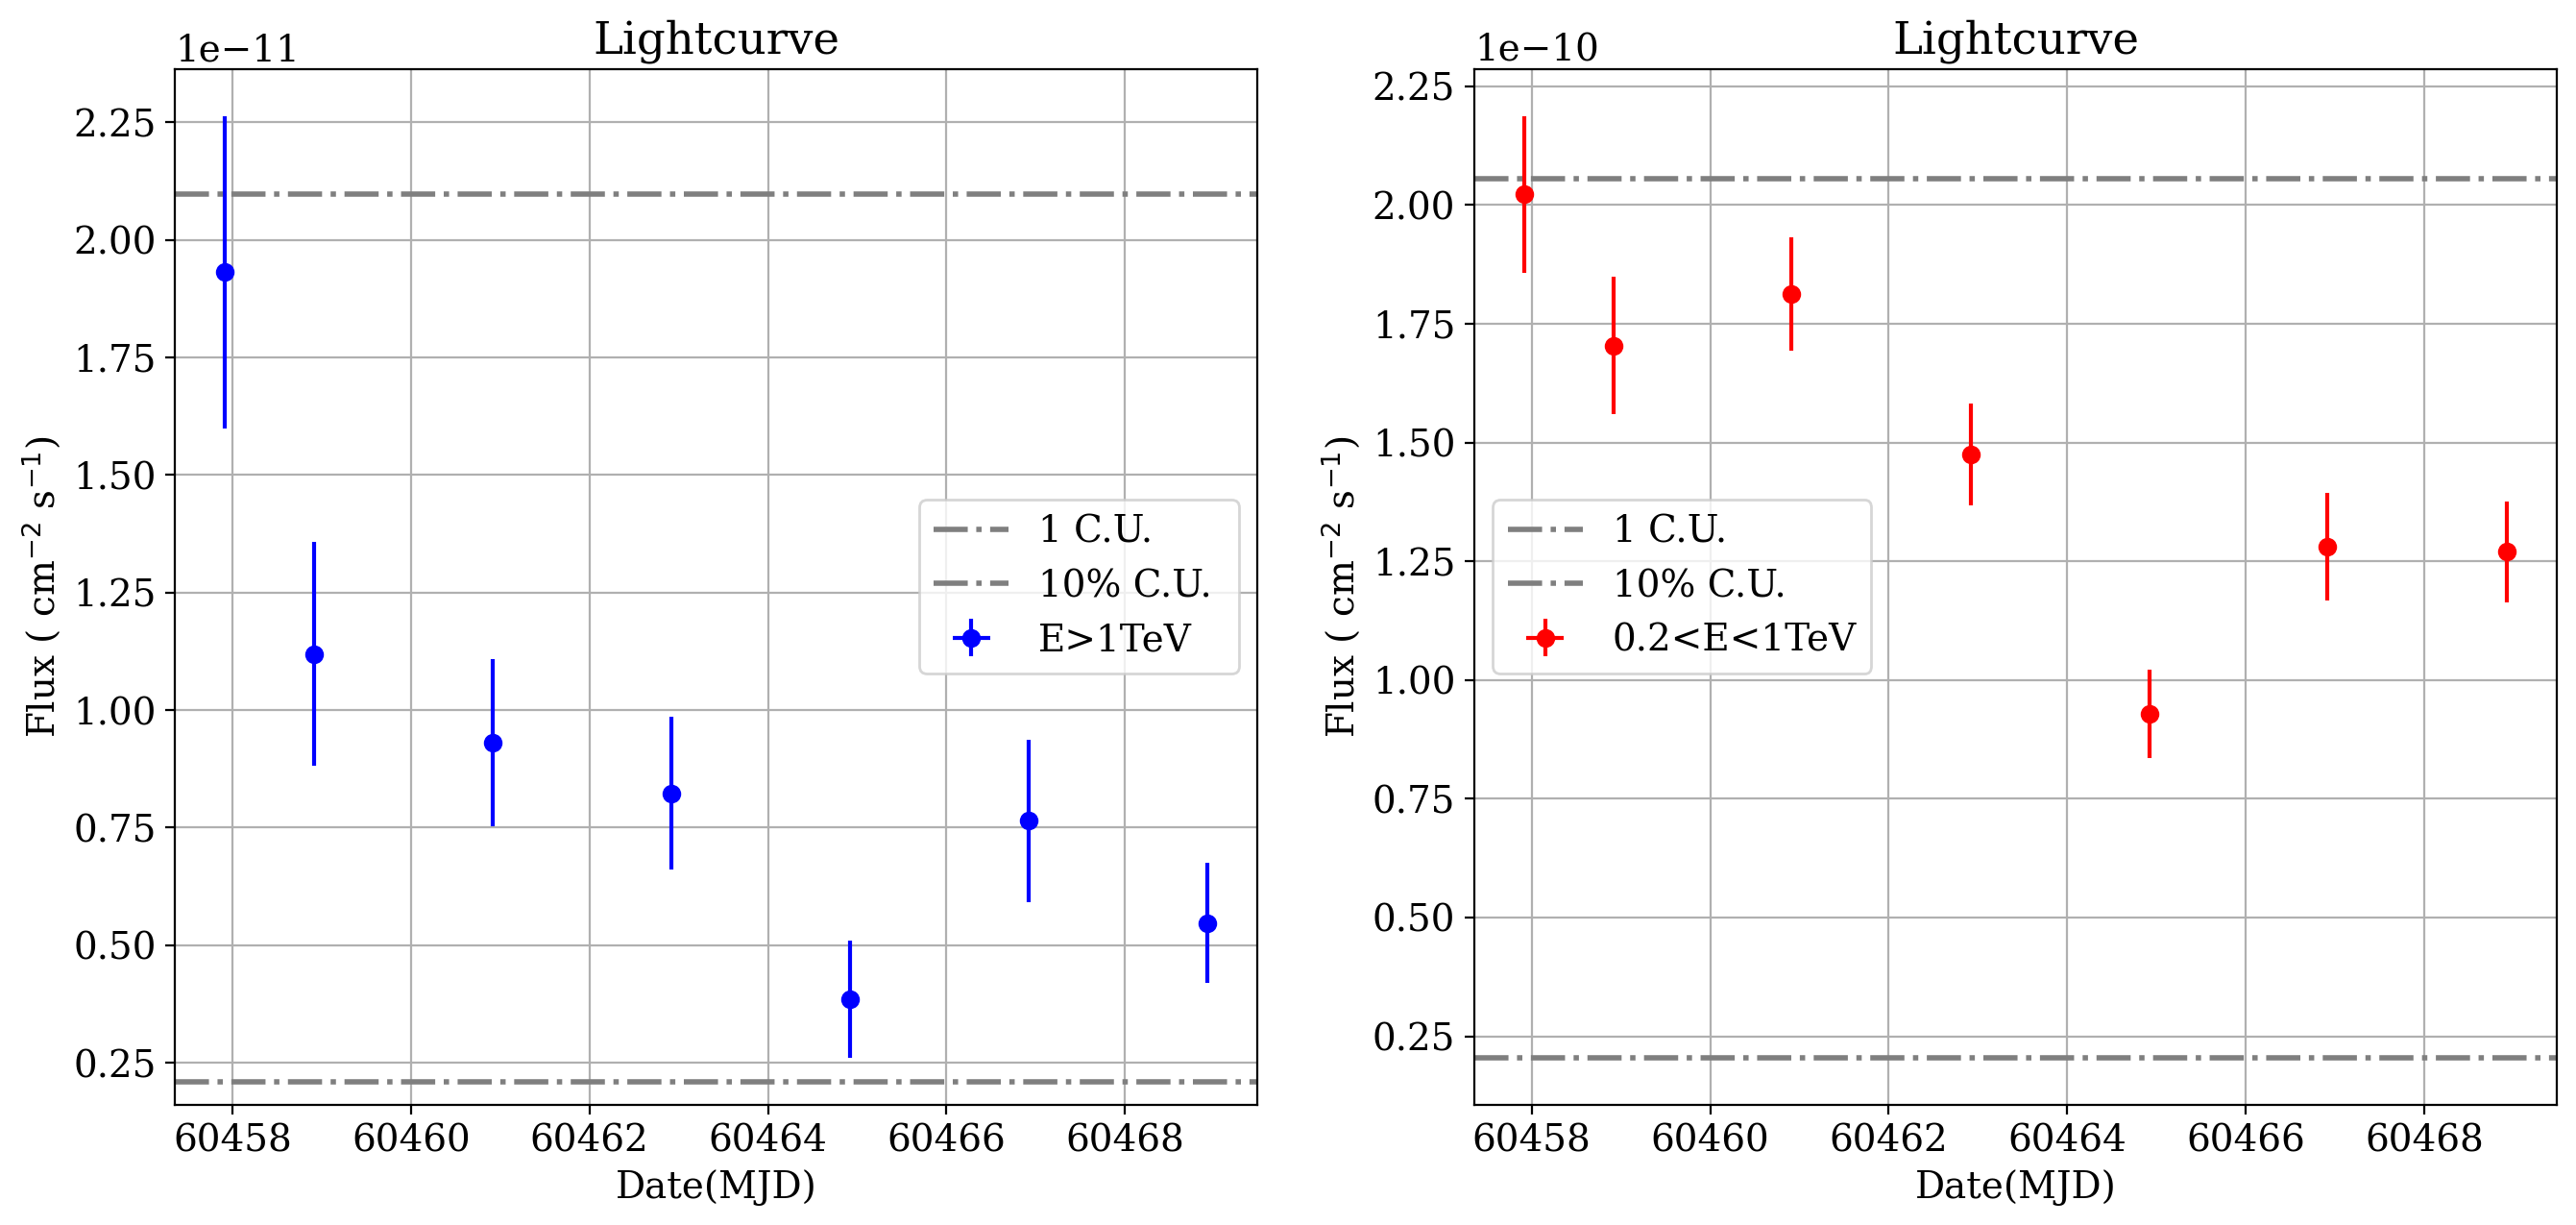

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16,7))
print (LCY, LCEY)
axs[0].errorbar(LCX, LCY, yerr=LCEY, xerr= LCEX,color='blue', label ="E>1TeV", fmt='o')
axs[0].axhline(y=2.097e-11, linestyle='-.', color='C7', label=r'1 C.U. ', linewidth=2)
axs[0].axhline(y=2.097e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
axs[0].set_title('Lightcurve')
axs[0].set_xlabel(r'Date(MJD)')
axs[0].set_ylabel(r'Flux ( cm$^{-2}$ s$^{-1}$)')
#axs[0].set_yscale('log')
axs[0].legend()
axs[0].grid(True)
print (lcY, lcEY)
axs[1].errorbar(lcX, lcY, yerr=lcEY, xerr= lcEX, color='red', label = "0.2<E<1TeV", fmt='o')
axs[1].axhline(y=20.56e-11, linestyle='-.', color='C7', label=r'1 C.U. ', linewidth=2)
axs[1].axhline(y=20.56e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
axs[1].set_title('Lightcurve')
#axs[1].set_yscale('log')
axs[1].set_xlabel(r'Date(MJD)')
axs[1].set_ylabel(r'Flux ( cm$^{-2}$ s$^{-1}$)')
axs[1].legend()
axs[1].grid(True)


In [20]:
#for E<1TeV
final_X=np.concatenate((fX, lcX))
final_EX=np.concatenate((fEX, lcEX))
final_Y=np.concatenate((fY, lcY))
final_EY=np.concatenate((fEY, lcEY))
#E>1TeV
finalX=np.concatenate((FX, LCX))
finalEX=np.concatenate((FEX, LCEX))
finalY=np.concatenate((FY, LCY))
finalEY=np.concatenate((FEY, LCEY))

In [21]:
#for E<1TeV with new specifications
final_mjd=np.concatenate((MJD_x, lcX))
final_Emjd=np.concatenate((MJD_ex, lcEX))
final_flux=np.concatenate((flux_y, lcY))
final_Eflux=np.concatenate((flux_ey, lcEY))
#E>1TeV
finalmjd=np.concatenate((MJD_X, LCX))
finalEmjd=np.concatenate((MJD_EX, LCEX))
finalflux=np.concatenate((flux_Y, LCY))
finalEflux=np.concatenate((flux_EY, LCEY))

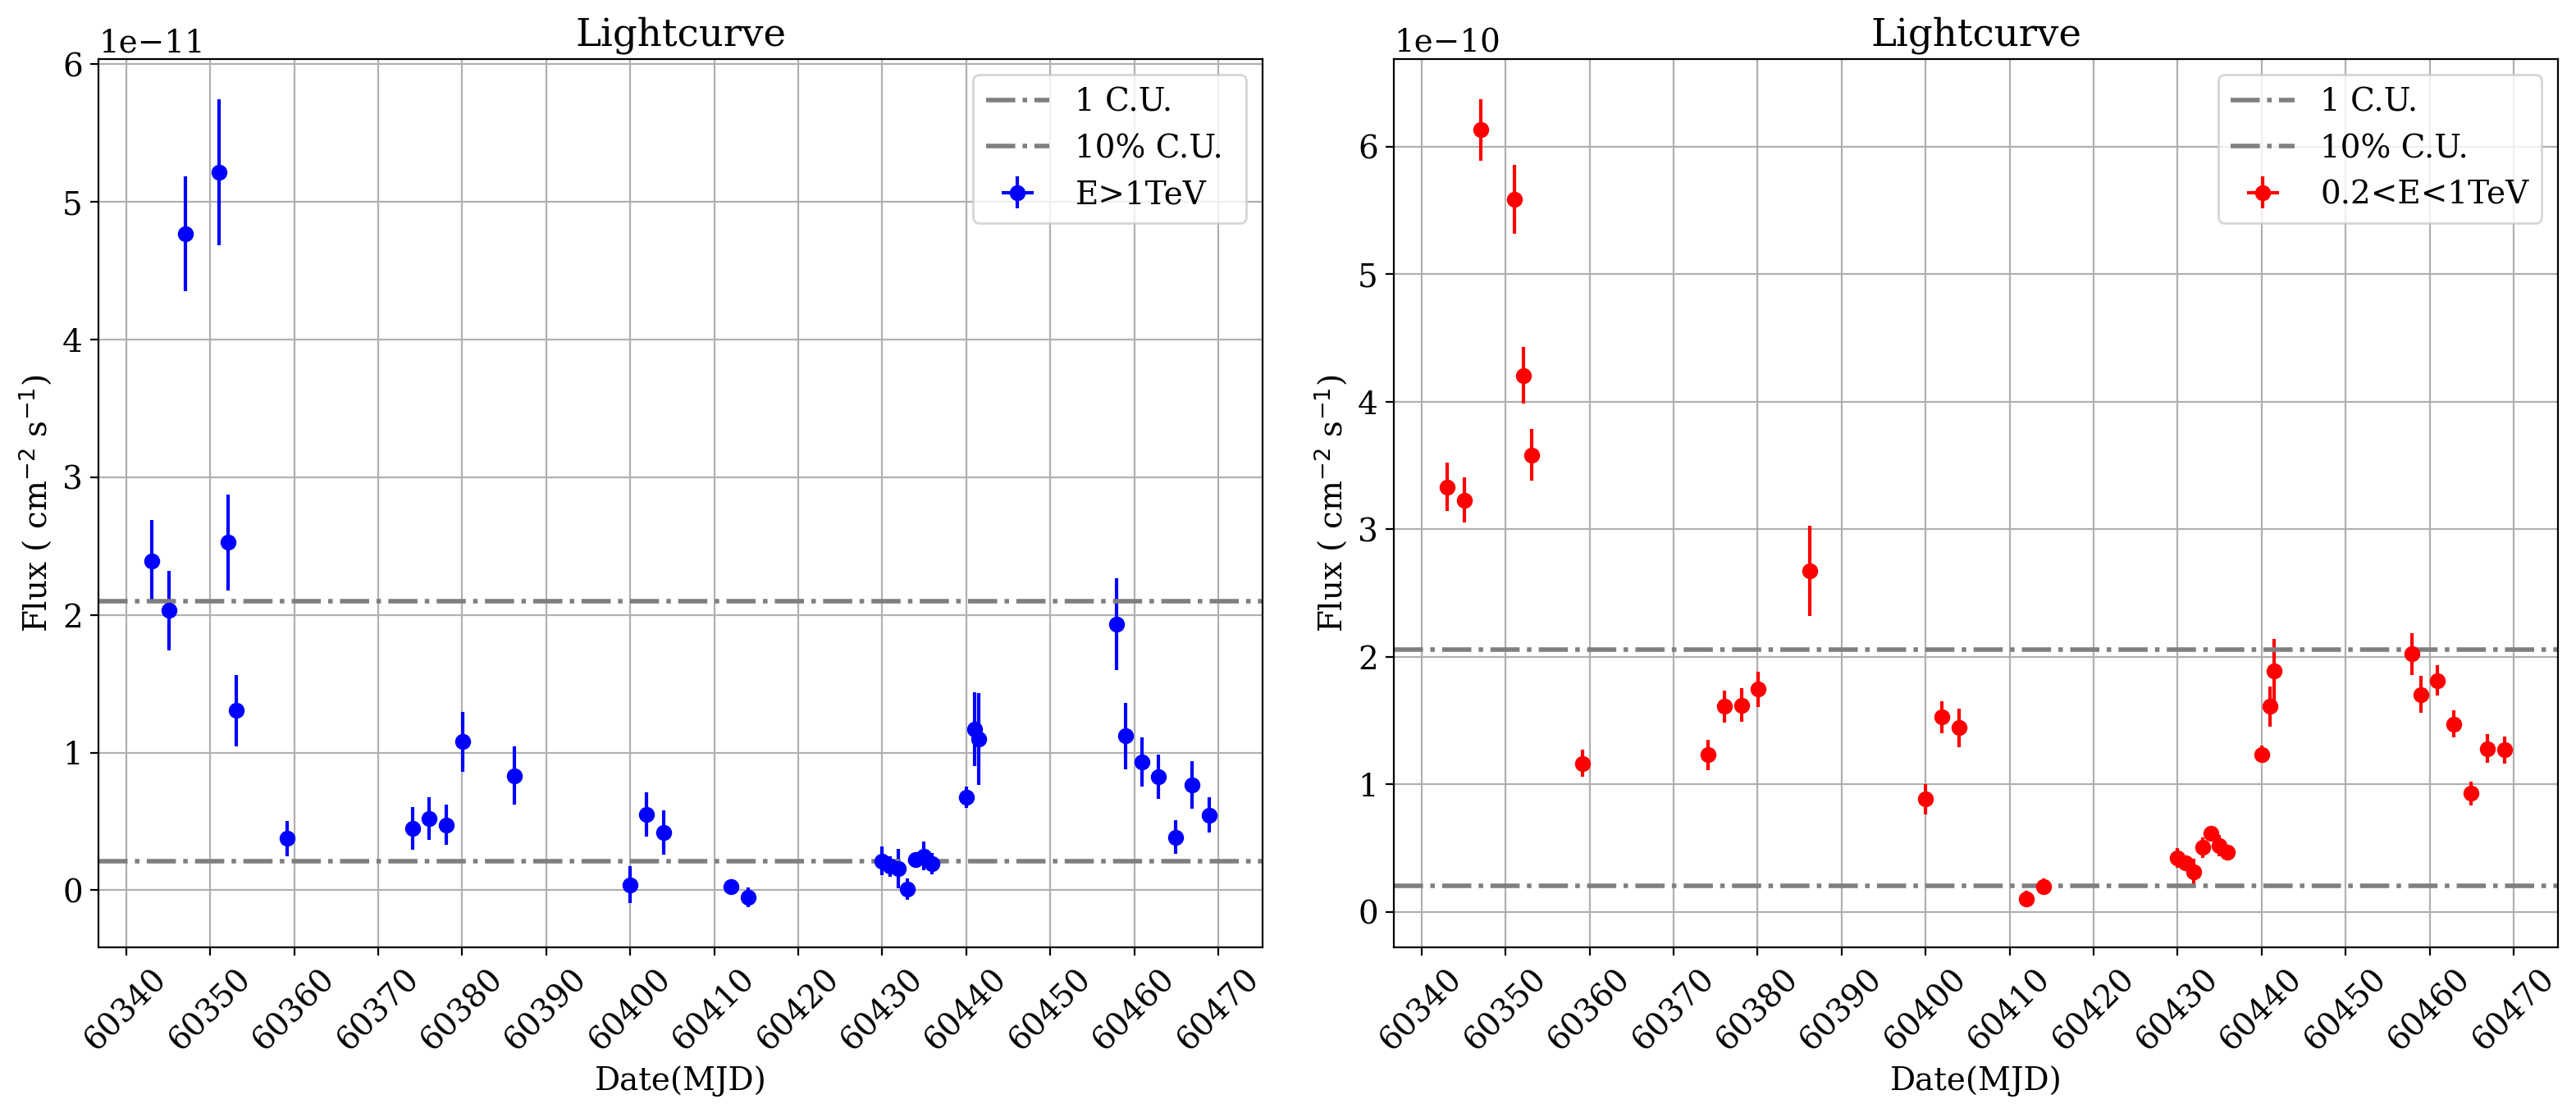

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(16,7))
x_ticks = np.arange(60340, 60475, 10)
axs[0].errorbar(finalX, finalY, yerr=finalEY, xerr= finalEX, color='blue', label ="E>1TeV", fmt='o')
axs[0].set_xticks(x_ticks)
axs[0].axhline(y=2.097e-11, linestyle='-.', color='C7', label=r'1 C.U. ', linewidth=2)
axs[0].axhline(y=2.097e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
axs[0].set_title('Lightcurve')
axs[0].set_xlabel(r'Date(MJD)')
axs[0].set_ylabel(r'Flux ( cm$^{-2}$ s$^{-1}$)')
axs[0].tick_params(axis='x', labelrotation=45)
#axs[0].set_yscale('log')
axs[0].legend()
axs[0].grid(True)
axs[1].errorbar(final_X, final_Y, yerr=final_EY, xerr= final_EX, color='red', label = "0.2<E<1TeV", fmt='o')
axs[1].set_xticks(x_ticks)
axs[1].axhline(y=20.56e-11, linestyle='-.', color='C7', label=r'1 C.U. ', linewidth=2)
axs[1].axhline(y=20.56e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
axs[1].set_title('Lightcurve')
axs[1].tick_params(axis='x', labelrotation=45)
#axs[1].set_yscale('log')
axs[1].set_xlabel(r'Date(MJD)')
axs[1].set_ylabel(r'Flux ( cm$^{-2}$ s$^{-1}$)')
axs[1].legend()
axs[1].grid(True)
fig.tight_layout()

plt.show()

In [26]:
xray_els2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_03to2keVflux.dat",delimiter=' ', skiprows=2)
xray_egs2kev= pd.read_csv("../../../media/varun-kelkar/DATA1/New-folder/LMU-MSc/Thesis/SWIFT-XRT/fitresults_xspec_logpar_2to10keVflux.dat",delimiter=' ', skiprows=2)

In [28]:
for col_name in xray_els2kev.columns:
    globals()[f'{col_name}_1'] = xray_els2kev[col_name].to_numpy()

In [31]:
for col_name in xray_egs2kev.columns:
    globals()[f'{col_name}_2'] = xray_egs2kev[col_name].to_numpy()

In [33]:
column_arrays = {}
for columnname in xray_egs2kev.columns:
    column_arrays[f'{columnname}_2'] = xray_egs2kev[columnname].to_numpy()

# Access the arrays using the keys in the dictionary
type(column_arrays)

dict

In [35]:
yerr_lower_1 = 10**(midlog_flux_1) - 10**(lowlog_flux_1)
yerr_upper_1 = 10**(highlog_flux_1) - 10**(midlog_flux_1)
yerr_lower_2 = 10**(midlog_flux_2) - 10**(lowlog_flux_2)
yerr_upper_2 = 10**(highlog_flux_2) - 10**(midlog_flux_2)

In [37]:
iindex = np.array([11, 15])
final_XX = np.delete(final_X, iindex)
finalXX = np.delete(finalX, iindex)
final_YY = np.delete(final_Y, iindex)
finalYY = np.delete(finalY, iindex)
final_EYY = np.delete(final_EY, iindex)
final_EXX = np.delete(final_EX, iindex)
finalEYY = np.delete(finalEY, iindex)
finalEXX = np.delete(finalEX, iindex)

iindex = np.array([11, 15])
final_mjd1 = np.delete(final_mjd, iindex)
finalmjd1 = np.delete(finalmjd, iindex)
final_flux1 = np.delete(final_flux, iindex)
finalflux1 = np.delete(finalflux, iindex)
final_Eflux1 = np.delete(final_Eflux, iindex)
final_Emjd1 = np.delete(final_Emjd, iindex)
finalEflux1 = np.delete(finalEflux, iindex)
finalEmjd1 = np.delete(finalEmjd, iindex)

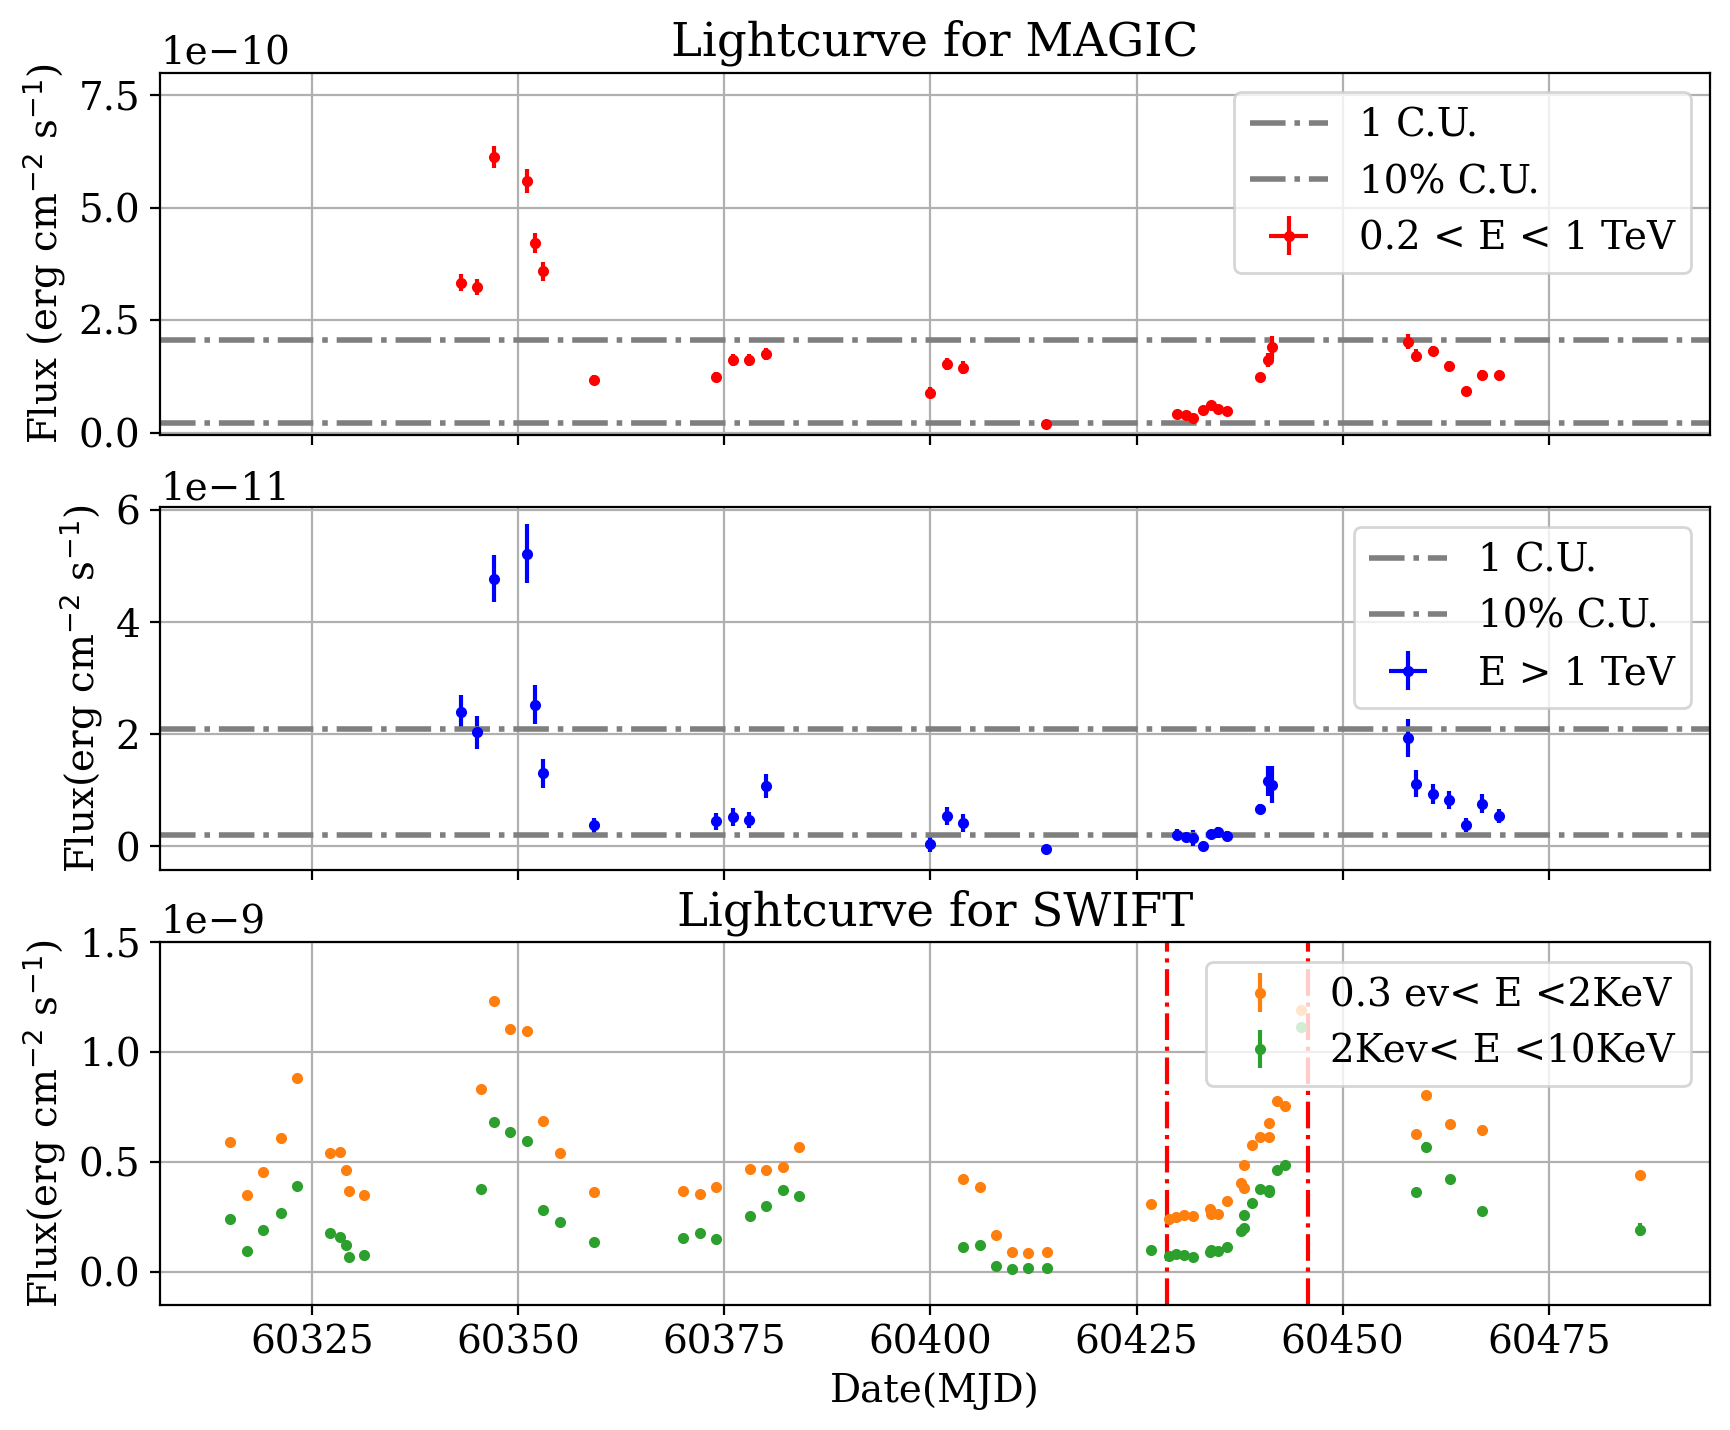

In [39]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(3)
axs = gs.subplots(sharex=True)
#fig.suptitle('Light Curve')
axs[0].errorbar(final_XX, final_YY, yerr=final_EYY, xerr=final_EXX, color='red', label="0.2 < E < 1 TeV", fmt='.')
#axs[0].errorbar(finalX, finalY, yerr=finalEY, xerr=finalEX, color='blue', label="E > 1 TeV", fmt='.')
axs[0].axhline(y=20.56e-11, linestyle='-.', color='C7', label=r'1 C.U. ', linewidth=2)
axs[0].axhline(y=20.56e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
axs[0].set_ylim(-0.5e-11, 8e-10)
axs[0].set_title('Lightcurve for MAGIC')
#axs[0].set_xlabel(r'Date(MJD)')
axs[0].set_ylabel(r'Flux (erg cm$^{-2}$ s$^{-1}$)')
axs[0].legend()
axs[0].grid(True)
#############################################
axs[1].errorbar(finalXX, finalYY, yerr=finalEYY, xerr=finalEXX, color='blue', label="E > 1 TeV", fmt='.')
axs[1].axhline(y=2.097e-11, linestyle='-.', color='C7', label=r'1 C.U. ', linewidth=2)
axs[1].axhline(y=2.097e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
#axs[1].set_xlabel(r'Date(MJD)')
axs[1].set_ylabel(r'Flux(erg cm$^{-2}$ s$^{-1}$)')
axs[1].legend()
axs[1].grid(True)
###########################################
axs[2].errorbar(MJD_1, 10**(midlog_flux_1), yerr=[(yerr_lower_1), (yerr_upper_1)], color= 'C1', fmt='.', label = '0.3 ev< E <2KeV')
axs[2].errorbar(MJD_2, 10**(midlog_flux_2), yerr=[(yerr_lower_2), (yerr_upper_2)], color = 'C2', fmt='.', label = '2Kev< E <10KeV')
plt.axvline(x=60428.75, color='r', linestyle='-.')
plt.axvline(x=60445.75, color='r', linestyle='-.')
axs[2].set_ylim(-0.15e-9, 1.5e-9)
axs[2].set_title('Lightcurve for SWIFT')
axs[2].set_xlabel(r'Date(MJD)')
axs[2].set_ylabel(r'Flux(erg cm$^{-2}$ s$^{-1}$)')
axs[2].legend(loc='upper right')
axs[2].grid(True)


plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_42127/3743715019.py:27: SyntaxWarning: invalid escape sequence '\m'
  axs[3].errorbar(MJD_1, 10**(midlog_flux_1)/10e-10, yerr=[(yerr_lower_1)/10e-10, (yerr_upper_1)/10e-10], color= 'C1', fmt='o', label = '$\mathit{Swift}$-XRT 0.3 - 2 keV')
/tmp/ipykernel_42127/3743715019.py:28: SyntaxWarning: invalid escape sequence '\m'
  axs[3].errorbar(MJD_2, 10**(midlog_flux_2)/10e-10, yerr=[(yerr_lower_2)/10e-10, (yerr_upper_2)/10e-10], color = 'C2', fmt='o', label = '$\mathit{Swift}$-XRT 2 - 10 keV')
/tmp/ipykernel_42127/3743715019.py:40: SyntaxWarning: invalid escape sequence '\m'
  axs[2].errorbar(fermi_mjd, fermi_flux/10e-8, yerr=fermi_eflux/10e-8, xerr=fermi_emjd, label="$\math

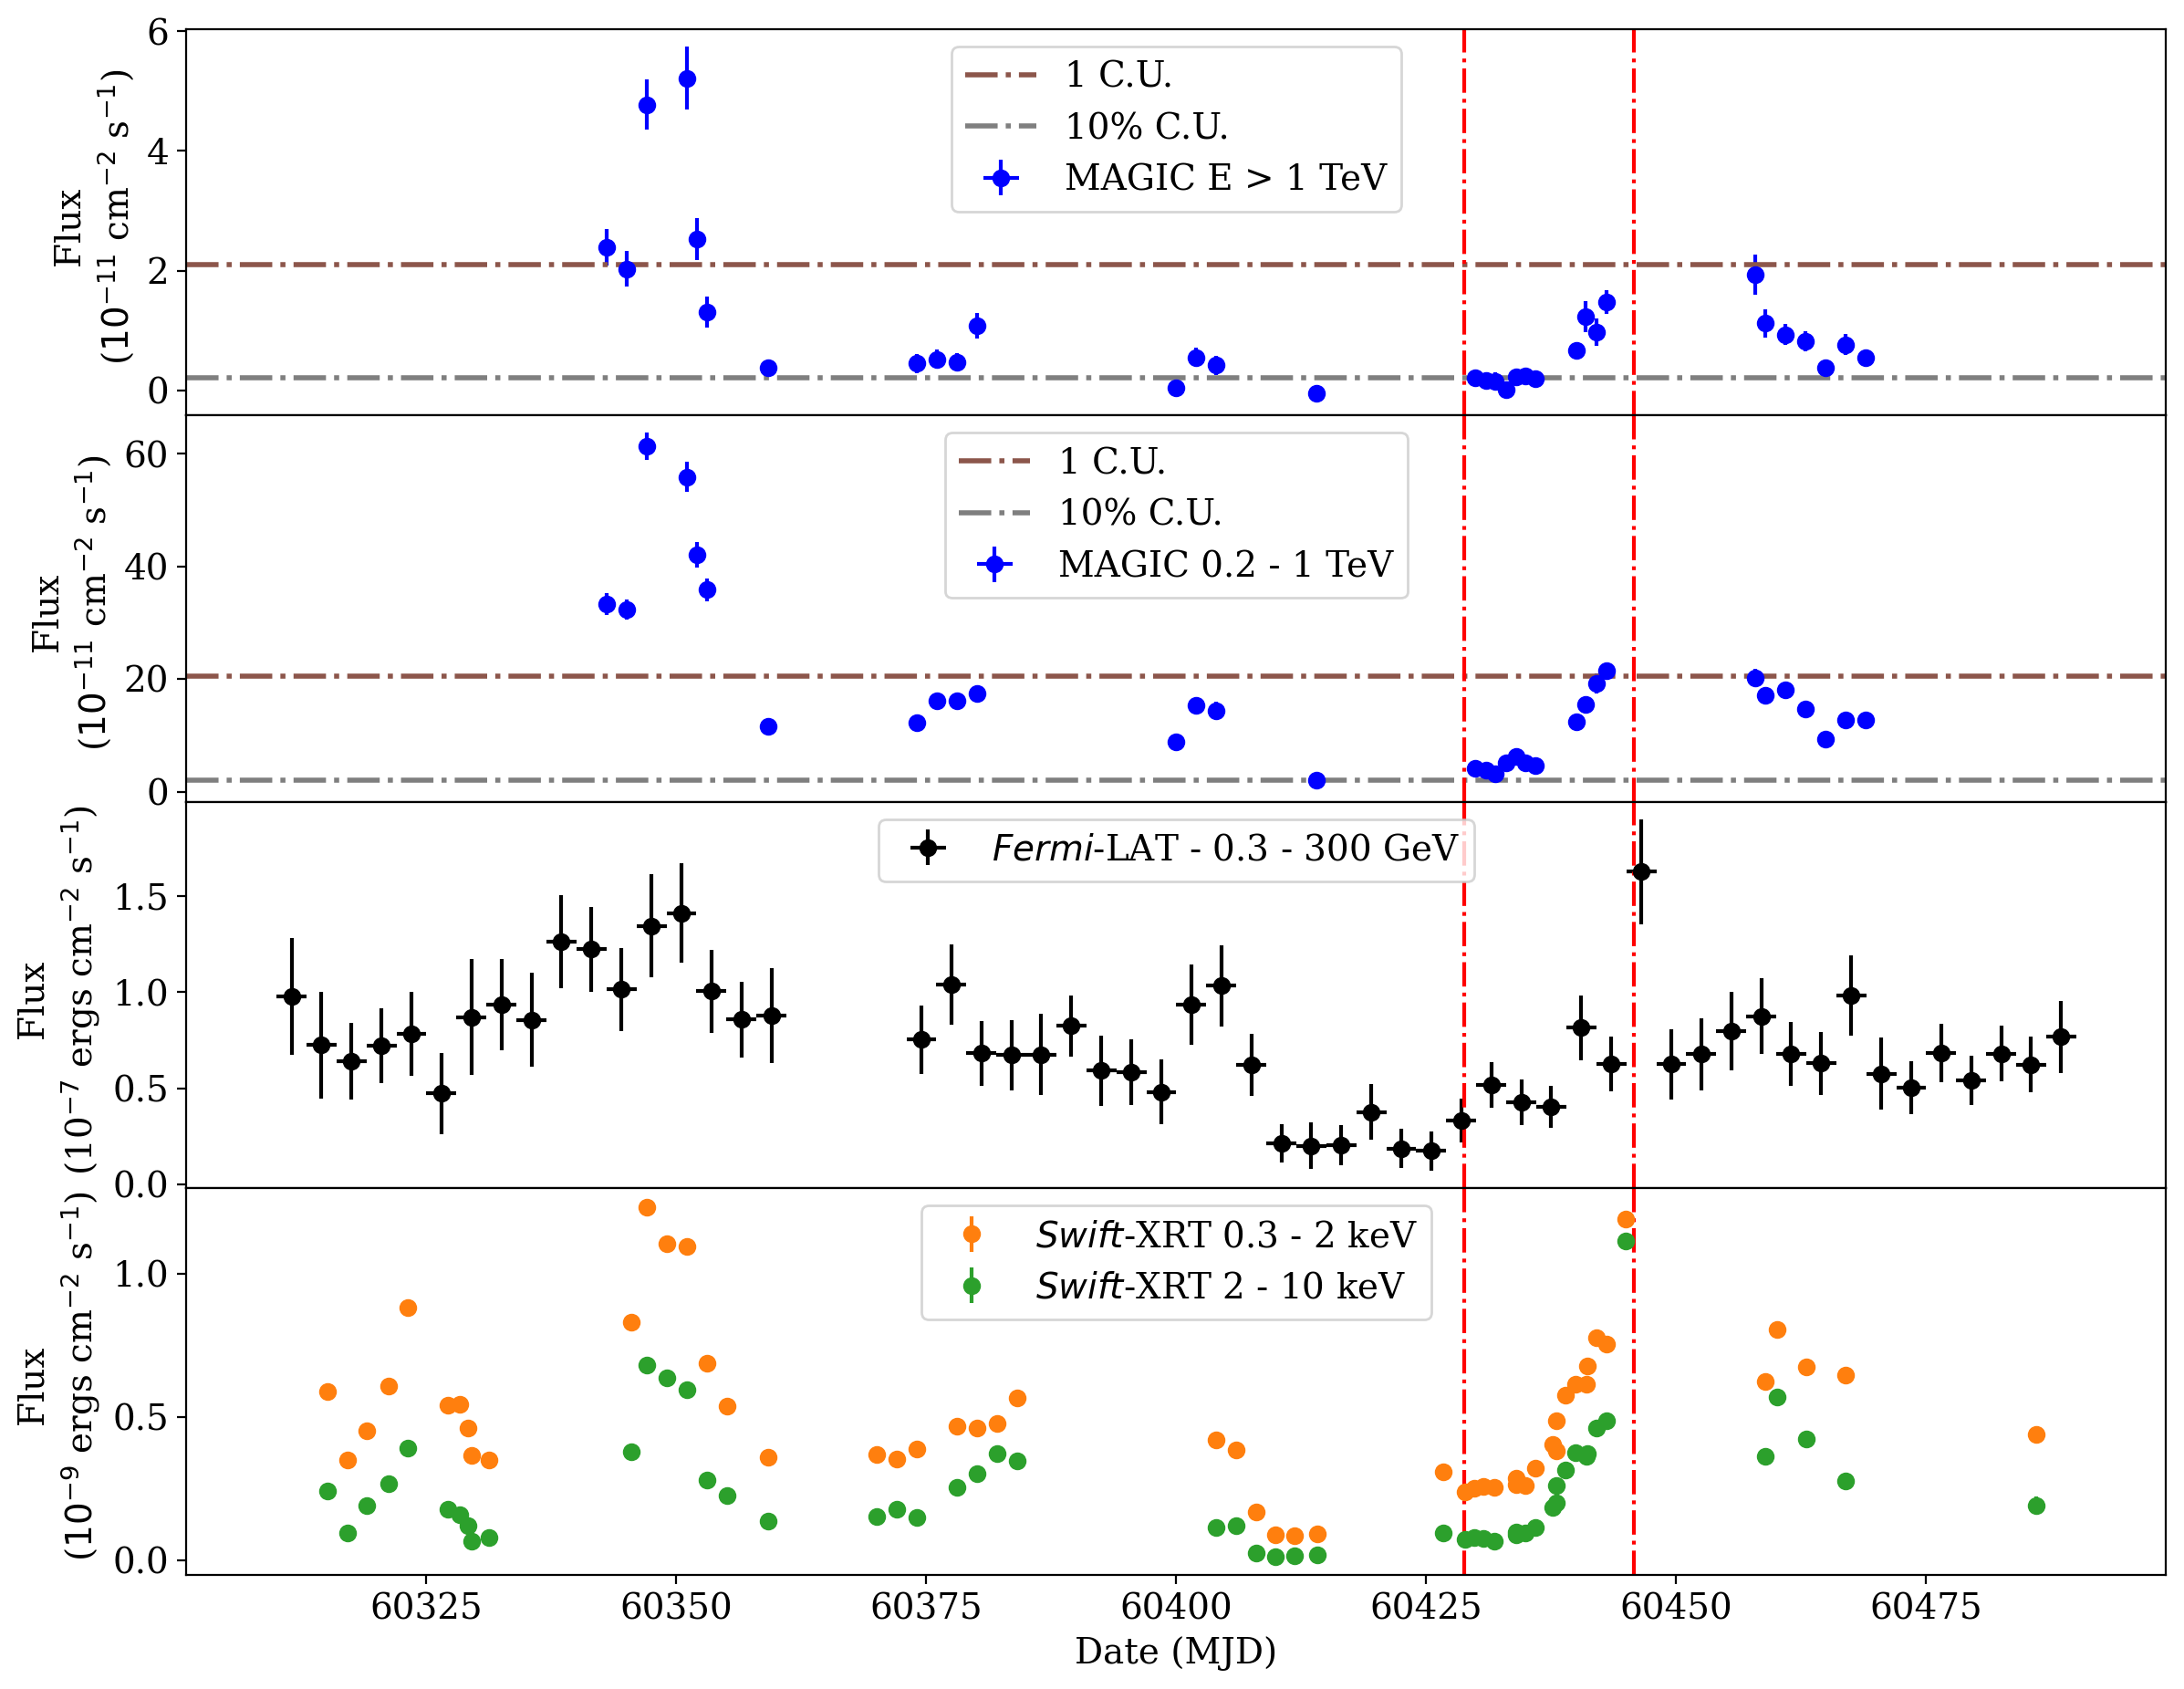

In [40]:
fig, axs = plt.subplots(4,1, figsize=(14,11), sharex=True)
fig.subplots_adjust(hspace=0.00)
#fig.suptitle('Light Curve')
axs[1].errorbar(final_mjd1, final_flux1/10e-12, yerr=final_Eflux1/10e-12, xerr=final_Emjd1, color='blue', label="MAGIC 0.2 - 1 TeV", fmt='o')
#axs[0].errorbar(finalX, finalY, yerr=finalEY, xerr=finalEX, color='blue', label="E > 1 TeV", fmt='.')
axs[1].axhline(y=20.56e-11/10e-12, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=2)
axs[1].axhline(y=20.56e-12/10e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
#axs[0].set_ylim(-0.5e-11, 8e-10)
#axs[1].set_title('Lightcurve for MAGIC')
#axs[0].set_xlabel(r'Date(MJD)')
axs[1].set_ylabel('Flux \n ($10^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[1].axvline(x=60428.75, color='r', linestyle='-.')
axs[1].axvline(x=60445.75, color='r', linestyle='-.')
axs[1].legend(loc='upper center')
#axs[1].grid(True)
#############################################
axs[0].errorbar(finalmjd1, finalflux1/10e-12, yerr=finalEflux1/10e-12, xerr=finalEmjd1, color='blue', label="MAGIC E > 1 TeV", fmt='o')
axs[0].axhline(y=2.097e-11/10e-12, linestyle='-.', color='C5', label=r'1 C.U. ', linewidth=2)
axs[0].axhline(y=2.097e-12/10e-12, linestyle='-.', color='C7', label=r'10% C.U. ', linewidth=2)
#axs[1].set_xlabel(r'Date(MJD)')
axs[0].set_ylabel('Flux \n ($10^{-11}$ cm$^{-2}$ s$^{-1}$)')
axs[0].axvline(x=60428.75, color='r', linestyle='-.')
axs[0].axvline(x=60445.75, color='r', linestyle='-.')
axs[0].legend(loc='upper center')
#axs[0].grid(True)
###########################################
axs[3].errorbar(MJD_1, 10**(midlog_flux_1)/10e-10, yerr=[(yerr_lower_1)/10e-10, (yerr_upper_1)/10e-10], color= 'C1', fmt='o', label = '$\mathit{Swift}$-XRT 0.3 - 2 keV')
axs[3].errorbar(MJD_2, 10**(midlog_flux_2)/10e-10, yerr=[(yerr_lower_2)/10e-10, (yerr_upper_2)/10e-10], color = 'C2', fmt='o', label = '$\mathit{Swift}$-XRT 2 - 10 keV')
axs[3].axvline(x=60428.75, color='r', linestyle='-.')
axs[3].axvline(x=60445.75, color='r', linestyle='-.')
#axs[2].set_ylim(-0.15e-9, 1.5e-9)
#axs[2].set_title('Lightcurve for SWIFT-XRT')

axs[3].set_ylabel('Flux \n ($10^{-9}$ ergs cm$^{-2}$ s$^{-1}$)')
axs[3].legend(loc='upper center')
#axs[2].grid(True)
#plt.tight_layout()
#plt.show()
##########################################################
axs[2].errorbar(fermi_mjd, fermi_flux/10e-8, yerr=fermi_eflux/10e-8, xerr=fermi_emjd, label="$\mathit{Fermi}$-LAT - 0.3 - 300 GeV", fmt='o', color = 'black')
axs[2].axvline(x=60428.75, color='r', linestyle='-.')
axs[2].axvline(x=60445.75, color='r', linestyle='-.')
axs[2].set_ylabel('Flux \n (10$^{-7}$ ergs cm$^{-2}$ s$^{-1}$)')
axs[2].legend(loc='upper center')
axs[3].set_xlabel(r'Date (MJD)')
plt.savefig('full_LC.png')
